In [8]:
import os
import sqlite3

import matplotlib.pyplot as plt
import numpy as np
import nfts.dataset

### Dataset Opening

In [9]:
dirname = os.path.dirname(os.path.abspath("__file__"))
DATASET_PATH = os.path.join(dirname, 'nfts.sqlite')
ds = nfts.dataset.FromSQLite(DATASET_PATH)

# dataset description
# nfts.dataset.explain()

# load current owners dataframe
current_owners_df = ds.load_dataframe("current_owners")


The Moonstream NFTs dataset

To load the NFTs dataset from a SQLite file, run:
>>> ds = nfts.dataset.FromSQLite(<path to sqlite database>)

This dataset consists of the following dataframes:

Dataframe: nfts
Load using:
	nfts_df = ds.load_dataframe(<sqlite connection or path to sqlite db>, "nfts")

Describes the NFT contracts represented in this dataset, with a name and symbol if they were available at time of crawl.

Columns:
1. address: The Ethereum address of the NFT contract.
2. name: The name of the collection of NFTs that the contract represents.
3. symbol: The symbol of the collection of NFTs that the contract represents.

- - -

Dataframe: mints
Load using:
	mints_df = ds.load_dataframe(<sqlite connection or path to sqlite db>, "mints")

All token mint events crawled in this dataset.

Columns:
1. event_id: A unique event ID associated with the event.
2. transaction_hash: The hash of the transaction which triggered the event.
3. block_number: The transaction block in which the 

### Who owns NFTs?

In [10]:
current_owners_df.head()

,nft_address,token_id,owner
0,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0,0xb776cAb26B9e6Be821842DC0cc0e8217489a4581
1,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,1,0x8A73024B39A4477a5Dc43fD6360e446851AD1D28
2,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,10,0x5e5C817E9264B46cBBB980198684Ad9d14f3e0B4
3,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,11,0x8376f63c13b99D3eedfA51ddd77Ff375279B3Ba0
4,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,12,0xb5e34552F32BA9226C987769BF6555a538510BA8


In [11]:
top_owners_df = current_owners_df.groupby(['owner'], as_index=False).size().rename(columns={"size":"num_tokens"})
top_owners_df.sort_values("num_tokens", inplace=True, ascending=False)

print(top_owners_df.head(20))

                                             owner  num_tokens
7272    0x02E4103b8A3c55AcDDF298311a9928f9Fe27822C      100045
0       0x0000000000000000000000000000000000000000       83548
470227  0xE052113bd7D7700d623414a0a4585BCaE754E9d5       51028
562045  0xcDA72070E455bb31C7690a170224Ce43623d0B6f       50131
369228  0x96bEE49d3386d674bF4E956D9B3ce61b9540409D       36751
439086  0xC69b4c6fFDBaF843A0d0588c99E3C67f27069BEa       32905
427270  0xBa0d01220a7CeA942596123102535F800f558763       32691
7       0x000000000000000000000000000000000000dEaD       19758
277     0x0008d343091EF8BD3EFA730F6aAE5A26a285C7a2       12137
454705  0xD387A6E4e84a6C86bd90C158C6028A58CC8Ac459       11497
574169  0xd5a9C4a92dDE274e126f82b215Fccb511147Cd8e       11274
93652   0x262492D7278c07444972f5AB4fBdDE10D4ca8BeA       10042
455404  0xD41a6AdeD13841121A15E503fE0b7a146bDcbE9f       10004
172177  0x4641C11787474940EB4b0EA578886c066fA28D40        7447
529401  0xb104371D5a2680fB0d47eA9A3aA2348392454186     

### NFT ownership

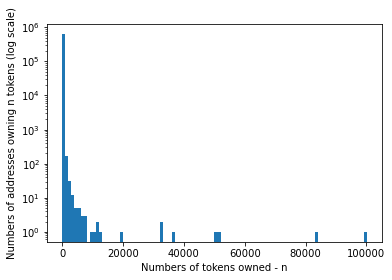

In [12]:
plt.xlabel('Numbers of tokens owned - n')
plt.ylabel('Numbers of addresses owning n tokens (log scale)')
_, _, _ = plt.hist(top_owners_df['num_tokens'], bins=100, log=True)

### Low Scale Owners

(array([6.02801e+05, 1.28570e+04, 4.08900e+03, 1.92700e+03, 1.06600e+03,
        6.53000e+02, 4.05000e+02, 2.90000e+02, 2.15000e+02, 1.71000e+02,
        1.34000e+02, 9.30000e+01, 9.80000e+01, 7.20000e+01, 3.90000e+01,
        4.50000e+01, 6.40000e+01, 4.20000e+01, 2.20000e+01, 2.20000e+01,
        2.10000e+01, 1.50000e+01, 1.90000e+01, 7.00000e+00, 1.40000e+01,
        1.50000e+01, 1.00000e+01, 9.00000e+00, 6.00000e+00, 5.00000e+00]),
 array([1.00000000e+00, 5.06666667e+01, 1.00333333e+02, 1.50000000e+02,
        1.99666667e+02, 2.49333333e+02, 2.99000000e+02, 3.48666667e+02,
        3.98333333e+02, 4.48000000e+02, 4.97666667e+02, 5.47333333e+02,
        5.97000000e+02, 6.46666667e+02, 6.96333333e+02, 7.46000000e+02,
        7.95666667e+02, 8.45333333e+02, 8.95000000e+02, 9.44666667e+02,
        9.94333333e+02, 1.04400000e+03, 1.09366667e+03, 1.14333333e+03,
        1.19300000e+03, 1.24266667e+03, 1.29233333e+03, 1.34200000e+03,
        1.39166667e+03, 1.44133333e+03, 1.49100000e+03])

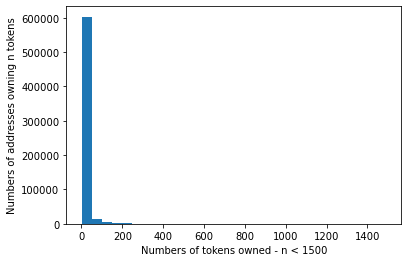

In [13]:
scale_cutoff = 1500
low_scale_owners = [num_tokens for num_tokens in top_owners_df['num_tokens'] 
                    if num_tokens<=scale_cutoff]

plt.xlabel(f'Numbers of tokens owned - n < {scale_cutoff}')
plt.ylabel('Numbers of addresses owning n tokens')
plt.hist(low_scale_owners, bins=int(scale_cutoff/50), log=False)

(array([6.02801e+05, 1.28570e+04, 4.08900e+03, 1.92700e+03, 1.06600e+03,
        6.53000e+02, 4.05000e+02, 2.90000e+02, 2.15000e+02, 1.71000e+02,
        1.34000e+02, 9.30000e+01, 9.80000e+01, 7.20000e+01, 3.90000e+01,
        4.50000e+01, 6.40000e+01, 4.20000e+01, 2.20000e+01, 2.20000e+01,
        2.10000e+01, 1.50000e+01, 1.90000e+01, 7.00000e+00, 1.40000e+01,
        1.50000e+01, 1.00000e+01, 9.00000e+00, 6.00000e+00, 5.00000e+00]),
 array([1.00000000e+00, 5.06666667e+01, 1.00333333e+02, 1.50000000e+02,
        1.99666667e+02, 2.49333333e+02, 2.99000000e+02, 3.48666667e+02,
        3.98333333e+02, 4.48000000e+02, 4.97666667e+02, 5.47333333e+02,
        5.97000000e+02, 6.46666667e+02, 6.96333333e+02, 7.46000000e+02,
        7.95666667e+02, 8.45333333e+02, 8.95000000e+02, 9.44666667e+02,
        9.94333333e+02, 1.04400000e+03, 1.09366667e+03, 1.14333333e+03,
        1.19300000e+03, 1.24266667e+03, 1.29233333e+03, 1.34200000e+03,
        1.39166667e+03, 1.44133333e+03, 1.49100000e+03])

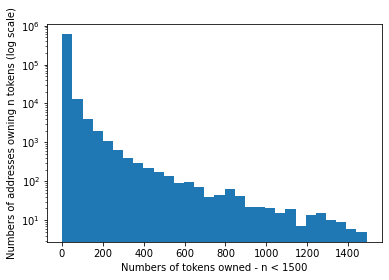

In [14]:
plt.xlabel(f'Numbers of tokens owned - n < {scale_cutoff}')
plt.ylabel('Numbers of addresses owning n tokens (log scale)')
plt.hist(low_scale_owners, bins=int(scale_cutoff/50), log=True)

### Conclusions